# World Development Indicators Mini Project

In [139]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

## Step 1: Initial exploration of the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# World Development Indicators Mini Project

In [141]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')

## What are the top 5 countries in electricty production from renewable sources (% of total) based on 2013 data and what is their 5 year historical trend?

In [142]:
# select electricty production from renewable sources
hist_indicatorcode = 'EG.ELC.RNWX.ZS'

mask1 = data['IndicatorCode'].str.contains(hist_indicatorcode)

stage = data[mask1]

In [143]:
stage.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
503,Euro area,EMU,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.615391
821,European Union,EUU,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.352812
1113,High income,HIC,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.150760
1313,High income: OECD,OEC,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.176297
2446,North America,NAC,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.013318
2569,OECD members,OED,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.176988
4218,Australia,AUS,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,1.412653
4408,Austria,AUT,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.000000
4927,Belgium,BEL,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.000000
6482,Canada,CAN,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.000000


In [144]:
# How many unique indicators codes are there ?
indicatorscode = stage['IndicatorCode'].unique().tolist()
len(indicatorscode)

1

### What is the range of years

In [145]:
years = stage['Year'].unique().tolist()
print(min(years)," to ",max(years))

1960  to  2013


### Filtering on most recent year of data to find the top 5 countries

In [146]:
# year filter for 2013
year_2013 = [2013]
data_2013 = stage[stage['Year'].isin(year_2013)]
data_2013.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5402689,Australia,AUS,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,5.794625
5403306,Austria,AUT,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,13.058638
5407896,Belgium,BEL,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,13.036474
5419999,Canada,CAN,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,3.206209
5422121,Chile,CHL,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,7.386477
5430320,Czech Republic,CZE,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,7.560197
5430998,Denmark,DNK,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,45.637778
5437422,Estonia,EST,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,8.938379
5439576,Finland,FIN,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,17.026017
5440230,France,FRA,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,4.669248


### Sorting 2013 data by Value in descending order to find top 5 countries

In [147]:
# sort values by descending order
sorted_2013 = data_2013.sort_values(by = ['Value'], ascending = False)
sorted_2013.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5430998,Denmark,DNK,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,45.637778
5496775,Portugal,PRT,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,31.165719
5452407,Iceland,ISL,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,28.979907
5509858,Spain,ESP,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,26.397930
5443430,Germany,DEU,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,20.896533


In [148]:
# create list of top 5 country codes
top_5_countries = sorted_2013.head(5)['CountryName'].unique().tolist()
len(top_5_countries)

5

In [149]:
top_5_countries

['Denmark', 'Portugal', 'Iceland', 'Spain', 'Germany']

### Filter data for top 5 countries for years 2009-2013

In [150]:
# create year filder for last 5 years of data
yearsFilter = [2009, 2010, 2011, 2012, 2013]

In [151]:
# apply year filter
filterdata1 = stage[stage['Year'].isin(yearsFilter)]

In [152]:
filterdata1

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4660550,Arab World,ARB,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2009,0.201709
4661584,Central Europe and the Baltics,CEB,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2009,2.902506
4662209,East Asia & Pacific (all income levels),EAS,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2009,1.826340
4662833,East Asia & Pacific (developing only),EAP,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2009,1.654295
4663581,Euro area,EMU,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2009,9.066678
...,...,...,...,...,...,...
5515061,Sweden,SWE,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,13.008893
5515712,Switzerland,CHE,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,2.787146
5522658,Turkey,TUR,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,3.998225
5526711,United Kingdom,GBR,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2013,13.595065


In [153]:
#apply top 5 countries filter
df = filterdata1[filterdata1['CountryName'].isin(top_5_countries)]

In [173]:
df.head(20)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4721506,Denmark,DNK,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2009,27.606300
4735812,Germany,DEU,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2009,12.861451
4745745,Iceland,ISL,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2009,27.046454
4796676,Portugal,PRT,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2009,20.223516
4811041,Spain,ESP,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2009,16.332327
4903298,Denmark,DNK,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2010,31.928362
4918005,Germany,DEU,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2010,13.394372
4928487,Iceland,ISL,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2010,26.173867
4981810,Portugal,PRT,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2010,22.731929
4996833,Spain,ESP,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,2010,18.594798


### Create Line Chart to Show 5 year trend for these 5 countries

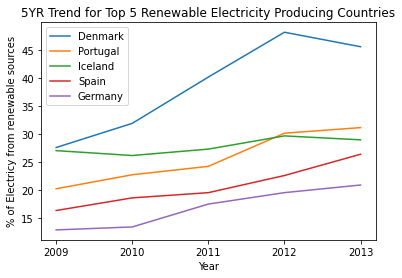

In [171]:
# plot top 5 countries data
fig,ax = plt.subplots()

for country in top_5_countries:
    ax.plot(df[df.CountryName==country].Year,df[df.CountryName==country].Value,label=country)

# label axes    
ax.set_xlabel("Year")
ax.set_ylabel("% of Electricy from renewable sources")

# add legend
ax.legend(loc='best')

# convert years to integers
ax.locator_params(integer=True)

#label figure
plt.title('5YR Trend for Top 5 Renewable Electricity Producing Countries')

plt.show()

Denmark is the country with the highest percent of electricty produced from renewable sources and has also shown the highest increase from 2009-2013 compared to the other 4 countries. As of 2012 Portugal has overtaken Iceland for the second highest percent of electricity produced from renewable sources.